**NOTEBOOK FOR IN DEPTH ANALYSIS OF RUNNING DATA**

Author : Andrea Valente

Date: May, 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns

same general stats as in java project +
* histogram of pace
* ml model to predict performance (you will have to find an indicator of good performance)

# Helper functions

In [2]:
def list_element_to_int(my_list:list):
    """
    returns elements of a list as integers
    """
    try:
        res = [int(x) for x in my_list]
        if len(res) > 2:
            return res[0] * 3600 + res[1] * 60 + res[2]
        else:
            return res[0] * 60 + res[1]
    except Exception as e:
        return np.nan

In [3]:
def hms_to_secs(time: pd.Series):
    """
    Converts time in the h:m:s format to seconds using the list_element_to_int fun
    """
    temp = time.apply(lambda x: x.split('.')[0]) # remove decimals (all after .)  
    temp2 = temp.str.split(':')
    return temp2.apply(lambda x: list_element_to_int(x))

How to write a function that takes a string and can be applied to pandas Series (df column)

# load data

In [5]:
rundata = pd.read_csv('D:/PycharmProjectsDD/NewRunAnalyzer/data/Activities_M.csv')
print('Shape of running dataset: ' + str(rundata.shape))

Shape of running dataset: (103, 40)


In [9]:
rundata

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg Run Cadence.1,Max Run Cadence.1,Training Stress Score®,Avg Power,Max Power,Grit,Flow,Avg. Swolf,Avg Stroke Rate,Total Reps,Dive Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2022-06-06 18:16:59,False,Reading - Easy Run,4.03,234,00:30:00,170,182,175,188,7:27,6:41,65,70,0.77,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,02:41.43.8,6,0.0,00:29:56,00:30:00,37,95
1,Running,2022-06-04 16:52:56,False,Reading - Benchmark Run,1.28,69,00:09:00.0,160,172,178,190,7:03,6:33,3,3,0.80,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,02:00.00,3,0.0,00:09:00.0,00:09:00.0,36,41
2,Running,2022-05-07 12:45:04,False,Appiano Gentile Running,5.01,285,00:36:14,166,182,178,191,7:14,5:54,24,24,0.78,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:03.80.2,6,0.0,00:36:07,00:36:14,335,349
3,Running,2022-04-25 18:31:39,False,Reading Running,6.45,361,00:48:04,163,183,176,186,7:27,6:46,8,14,0.76,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,03:03.37.8,7,0.0,00:48:01,00:48:04,26,51
4,Running,2022-04-23 17:55:27,False,Reading Running,10.01,598,01:13:57,170,180,178,188,7:23,6:23,42,45,0.76,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:05.97.7,11,0.0,01:13:51,01:13:57,28,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Running,2021-07-19 18:36:41,False,Reading Running,4.85,264,00:34:47,168,181,174,186,7:11,1:19,20,22,0.80,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,05:57.37.7,5,0.0,00:34:45,00:34:47,37,44
99,Running,2021-07-17 12:24:29,False,Reading Running,8.01,476,01:03:59,170,181,174,192,8:00,1:34,30,33,0.72,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:03.02.3,9,0.0,00:00:00,01:03:59,36,44
100,Running,2021-07-13 18:01:40,False,Reading Running,7.00,385,00:54:38,160,176,166,192,7:48,2:28,53,56,0.78,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:01.16.2,8,0.0,00:54:36,00:54:38,34,44
101,Running,2021-07-12 18:07:56,False,Reading Running,4.86,278,00:35:15,169,185,176,188,7:16,3:09,30,34,0.78,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,05:42.03.6,5,0.0,00:35:12,00:35:15,34,44


# prepare and analyze

## Set columns

In [10]:
cols = ['Date','Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length',
       'Best Lap Time', 'Moving Time',
       'Elapsed Time', 'Min Elevation', 'Max Elevation'] #'Aerobic TE',

In [11]:
rundata = rundata[cols]

In [12]:
rundata.head()

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,2022-06-06 18:16:59,Reading - Easy Run,4.03,234,00:30:00,170,182,175,188,7:27,6:41,65,70,0.77,02:41.43.8,00:29:56,00:30:00,37,95
1,2022-06-04 16:52:56,Reading - Benchmark Run,1.28,69,00:09:00.0,160,172,178,190,7:03,6:33,3,3,0.80,02:00.00,00:09:00.0,00:09:00.0,36,41
2,2022-05-07 12:45:04,Appiano Gentile Running,5.01,285,00:36:14,166,182,178,191,7:14,5:54,24,24,0.78,00:03.80.2,00:36:07,00:36:14,335,349
3,2022-04-25 18:31:39,Reading Running,6.45,361,00:48:04,163,183,176,186,7:27,6:46,8,14,0.76,03:03.37.8,00:48:01,00:48:04,26,51
4,2022-04-23 17:55:27,Reading Running,10.01,598,01:13:57,170,180,178,188,7:23,6:23,42,45,0.76,00:05.97.7,01:13:51,01:13:57,28,64


In [13]:
#rundata.Title.value_counts()

## Data types

In [14]:
rundata.dtypes

Date                  object
Title                 object
Distance             float64
Calories              object
Time                  object
Avg HR                 int64
Max HR                 int64
Avg Run Cadence        int64
Max Run Cadence        int64
Avg Pace              object
Best Pace             object
Total Ascent          object
Total Descent         object
Avg Stride Length    float64
Best Lap Time         object
Moving Time           object
Elapsed Time          object
Min Elevation         object
Max Elevation         object
dtype: object

In [15]:
rundata['Short_date'] = rundata['Date'].str[0:10]

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/305588284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Short_date'] = rundata['Date'].str[0:10]


In [16]:
rundata['Date'] = pd.to_datetime(rundata['Date'], infer_datetime_format=True)

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/1567046397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Date'] = pd.to_datetime(rundata['Date'], infer_datetime_format=True)


In [17]:
rundata.sort_values(by=['Date'],inplace=True)

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/2699122995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata.sort_values(by=['Date'],inplace=True)


In [18]:
rundata['Calories'] = rundata['Calories'].replace(',','',regex=True).astype(int)

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/3977248747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Calories'] = rundata['Calories'].replace(',','',regex=True).astype(int)


## New columns

In [19]:
rundata['Distance_in_miles'] = (rundata['Distance'] / 1.609344)

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/3172300887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Distance_in_miles'] = (rundata['Distance'] / 1.609344)


In [20]:
rundata['Time_in_secs'] = hms_to_secs(rundata['Time'])

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/957843406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Time_in_secs'] = hms_to_secs(rundata['Time'])


In [21]:
rundata['Avg_pace_secs'] = hms_to_secs(rundata['Avg Pace'])  

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/3711499640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Avg_pace_secs'] = hms_to_secs(rundata['Avg Pace'])


In [22]:
rundata['Best_pace_secs'] = hms_to_secs(rundata['Best Pace'])  

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/3650079155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Best_pace_secs'] = hms_to_secs(rundata['Best Pace'])


In [23]:
rundata['Hour_of_day'] = rundata['Date'].dt.hour

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/3494884385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Hour_of_day'] = rundata['Date'].dt.hour


In [24]:
rundata['Month'] = rundata['Date'].dt.month.astype(str)

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/1950149447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Month'] = rundata['Date'].dt.month.astype(str)


In [25]:
rundata['Month_Year'] = rundata['Date'].dt.to_period('M')

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/4005148507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Month_Year'] = rundata['Date'].dt.to_period('M')


In [26]:
rundata['Short_date'] = pd.to_datetime(rundata['Short_date'])

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/3533417964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Short_date'] = pd.to_datetime(rundata['Short_date'])


In [27]:
# moving average pace
rundata['Pace_MA_7'] = rundata['Avg_pace_secs'].rolling(7).mean()
rundata['Pace_MA_30'] = rundata['Avg_pace_secs'].rolling(30).mean()

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/3451604640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Pace_MA_7'] = rundata['Avg_pace_secs'].rolling(7).mean()
C:\Users\valen\AppData\Local\Temp/ipykernel_14772/3451604640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Pace_MA_30'] = rundata['Avg_pace_secs'].rolling(30).mean()


In [28]:
# moving average distance
rundata['Distance_MA_30'] = rundata['Distance'].rolling(30).mean()
rundata['Distance_MA_60'] = rundata['Distance'].rolling(60).mean()

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/1972422075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Distance_MA_30'] = rundata['Distance'].rolling(30).mean()
C:\Users\valen\AppData\Local\Temp/ipykernel_14772/1972422075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Distance_MA_60'] = rundata['Distance'].rolling(60).mean()


In [29]:
# heart rate moving average
rundata['Avg_HR_MA_30'] = rundata['Avg HR'].rolling(30).mean()
rundata['Avg_HR_MA_60'] = rundata['Avg HR'].rolling(60).mean()

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/772835204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Avg_HR_MA_30'] = rundata['Avg HR'].rolling(30).mean()
C:\Users\valen\AppData\Local\Temp/ipykernel_14772/772835204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata['Avg_HR_MA_60'] = rundata['Avg HR'].rolling(60).mean()


In [30]:
rundata.head()

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Pace_MA_7,Pace_MA_30,Distance_MA_30,Distance_MA_60,Avg_HR_MA_30,Avg_HR_MA_60
102,2021-07-10 12:44:41,Reading Running,6.45,380,00:47:34,169,189,174,182,7:22,1:08,58,65,0.78,00:05.15.2,00:47:32,00:47:34,34,45,2021-07-10,4.007844,2854,442,68,12,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
101,2021-07-12 18:07:56,Reading Running,4.86,278,00:35:15,169,185,176,188,7:16,3:09,30,34,0.78,05:42.03.6,00:35:12,00:35:15,34,44,2021-07-12,3.019864,2115,436,189,18,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
100,2021-07-13 18:01:40,Reading Running,7.00,385,00:54:38,160,176,166,192,7:48,2:28,53,56,0.78,00:01.16.2,00:54:36,00:54:38,34,44,2021-07-13,4.349598,3278,468,148,18,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
99,2021-07-17 12:24:29,Reading Running,8.01,476,01:03:59,170,181,174,192,8:00,1:34,30,33,0.72,00:03.02.3,00:00:00,01:03:59,36,44,2021-07-17,4.977183,3839,480,94,12,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
98,2021-07-19 18:36:41,Reading Running,4.85,264,00:34:47,168,181,174,186,7:11,1:19,20,22,0.80,05:57.37.7,00:34:45,00:34:47,37,44,2021-07-19,3.013650,2087,431,79,18,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
rundata.sort_values(by =['Date'],inplace=True)

C:\Users\valen\AppData\Local\Temp/ipykernel_14772/2815905265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rundata.sort_values(by =['Date'],inplace=True)


In [32]:
rundata.reset_index(drop=True,inplace=True)

In [33]:
rundata.head(10)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Pace_MA_7,Pace_MA_30,Distance_MA_30,Distance_MA_60,Avg_HR_MA_30,Avg_HR_MA_60
0,2021-07-10 12:44:41,Reading Running,6.45,380,00:47:34,169,189,174,182,7:22,1:08,58,65,0.78,00:05.15.2,00:47:32,00:47:34,34,45,2021-07-10,4.007844,2854,442,68,12,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-12 18:07:56,Reading Running,4.86,278,00:35:15,169,185,176,188,7:16,3:09,30,34,0.78,05:42.03.6,00:35:12,00:35:15,34,44,2021-07-12,3.019864,2115,436,189,18,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-13 18:01:40,Reading Running,7.00,385,00:54:38,160,176,166,192,7:48,2:28,53,56,0.78,00:01.16.2,00:54:36,00:54:38,34,44,2021-07-13,4.349598,3278,468,148,18,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-17 12:24:29,Reading Running,8.01,476,01:03:59,170,181,174,192,8:00,1:34,30,33,0.72,00:03.02.3,00:00:00,01:03:59,36,44,2021-07-17,4.977183,3839,480,94,12,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-07-19 18:36:41,Reading Running,4.85,264,00:34:47,168,181,174,186,7:11,1:19,20,22,0.80,05:57.37.7,00:34:45,00:34:47,37,44,2021-07-19,3.013650,2087,431,79,18,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-08-07 11:47:23,Reading Running,4.83,282,00:36:56,170,184,172,188,7:38,4:43,23,22,0.76,06:36.43,00:36:54,00:36:56,38,46,2021-08-07,3.001223,2216,458,283,11,8,2021-08,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-08-10 19:06:43,Reading Running,5.00,285,00:35:34,174,192,174,186,7:07,1:12,24,23,0.81,00:02.32.9,00:00:00,00:35:34,38,46,2021-08-10,3.106856,2134,427,72,19,8,2021-08,448.857143,NaN,NaN,NaN,NaN,NaN
7,2021-08-11 17:54:10,Reading Running,5.01,285,00:36:21,171,188,174,190,7:15,3:00,25,27,0.79,00:03.09.9,00:36:18,00:36:21,34,44,2021-08-11,3.113070,2181,435,180,17,8,2021-08,447.857143,NaN,NaN,NaN,NaN,NaN
8,2021-08-12 18:51:49,Reading Running,5.01,284,00:37:26,169,185,174,190,7:29,2:04,30,24,0.77,00:03.30.3,00:37:23,00:37:26,38,51,2021-08-12,3.113070,2246,449,124,18,8,2021-08,449.714286,NaN,NaN,NaN,NaN,NaN
9,2021-08-16 17:18:10,Reading Running,5.00,270,00:35:45,167,182,176,190,7:09,4:27,26,22,0.80,00:03.69.8,00:35:43,00:35:45,38,47,2021-08-16,3.106856,2145,429,267,17,8,2021-08,444.142857,NaN,NaN,NaN,NaN,NaN


In [35]:
desc_cols = ['Distance','Avg HR','Max HR','Avg Run Cadence','Max Run Cadence','Avg Stride Length',
            'Time_in_secs','Avg_pace_secs','Hour_of_day','Calories','Best_pace_secs']

In [36]:
rundata[desc_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Distance,103.0,6.079903,3.198753,1.28,4.165,5.01,6.595,17.70
Avg HR,103.0,161.766990,7.480961,133.00,158.000,163.00,167.000,174.00
Max HR,103.0,180.242718,7.176304,156.00,178.000,181.00,184.000,196.00
Avg Run Cadence,103.0,175.961165,2.558808,166.00,174.000,176.00,177.500,183.00
Max Run Cadence,103.0,189.757282,3.879221,182.00,188.000,190.00,192.000,202.00
Avg Stride Length,103.0,0.789612,0.041960,0.63,0.770,0.79,0.815,0.89
Time_in_secs,103.0,2667.485437,1510.931370,540.00,1973.000,2163.00,2869.000,8517.00
Avg_pace_secs,103.0,433.252427,27.282012,377.00,417.000,431.00,445.000,564.00
Hour_of_day,103.0,14.524272,4.050768,6.00,12.000,17.00,18.000,19.00
Calories,103.0,348.864078,197.523046,56.00,242.000,285.00,387.500,1114.00


In [37]:
rundata.head(10)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Pace_MA_7,Pace_MA_30,Distance_MA_30,Distance_MA_60,Avg_HR_MA_30,Avg_HR_MA_60
0,2021-07-10 12:44:41,Reading Running,6.45,380,00:47:34,169,189,174,182,7:22,1:08,58,65,0.78,00:05.15.2,00:47:32,00:47:34,34,45,2021-07-10,4.007844,2854,442,68,12,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-12 18:07:56,Reading Running,4.86,278,00:35:15,169,185,176,188,7:16,3:09,30,34,0.78,05:42.03.6,00:35:12,00:35:15,34,44,2021-07-12,3.019864,2115,436,189,18,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-13 18:01:40,Reading Running,7.00,385,00:54:38,160,176,166,192,7:48,2:28,53,56,0.78,00:01.16.2,00:54:36,00:54:38,34,44,2021-07-13,4.349598,3278,468,148,18,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-17 12:24:29,Reading Running,8.01,476,01:03:59,170,181,174,192,8:00,1:34,30,33,0.72,00:03.02.3,00:00:00,01:03:59,36,44,2021-07-17,4.977183,3839,480,94,12,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-07-19 18:36:41,Reading Running,4.85,264,00:34:47,168,181,174,186,7:11,1:19,20,22,0.80,05:57.37.7,00:34:45,00:34:47,37,44,2021-07-19,3.013650,2087,431,79,18,7,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-08-07 11:47:23,Reading Running,4.83,282,00:36:56,170,184,172,188,7:38,4:43,23,22,0.76,06:36.43,00:36:54,00:36:56,38,46,2021-08-07,3.001223,2216,458,283,11,8,2021-08,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-08-10 19:06:43,Reading Running,5.00,285,00:35:34,174,192,174,186,7:07,1:12,24,23,0.81,00:02.32.9,00:00:00,00:35:34,38,46,2021-08-10,3.106856,2134,427,72,19,8,2021-08,448.857143,NaN,NaN,NaN,NaN,NaN
7,2021-08-11 17:54:10,Reading Running,5.01,285,00:36:21,171,188,174,190,7:15,3:00,25,27,0.79,00:03.09.9,00:36:18,00:36:21,34,44,2021-08-11,3.113070,2181,435,180,17,8,2021-08,447.857143,NaN,NaN,NaN,NaN,NaN
8,2021-08-12 18:51:49,Reading Running,5.01,284,00:37:26,169,185,174,190,7:29,2:04,30,24,0.77,00:03.30.3,00:37:23,00:37:26,38,51,2021-08-12,3.113070,2246,449,124,18,8,2021-08,449.714286,NaN,NaN,NaN,NaN,NaN
9,2021-08-16 17:18:10,Reading Running,5.00,270,00:35:45,167,182,176,190,7:09,4:27,26,22,0.80,00:03.69.8,00:35:43,00:35:45,38,47,2021-08-16,3.106856,2145,429,267,17,8,2021-08,444.142857,NaN,NaN,NaN,NaN,NaN


# Plots

## Average pace wit moving averages

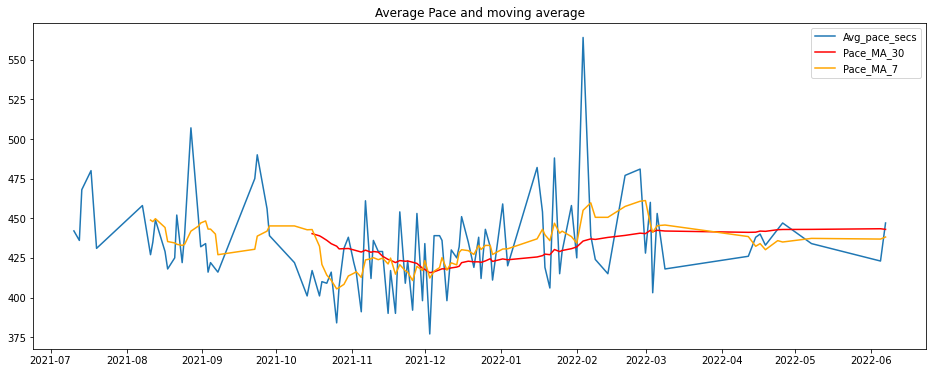

In [38]:
plt.figure(figsize=(16,6))
plt.title("Average Pace and moving average")
plt.plot(rundata['Date'],rundata['Avg_pace_secs'],label='avg pace')
plt.plot(rundata['Date'],rundata['Pace_MA_30'],label='mov avg 30', color='red') #linestyle="-."
plt.plot(rundata['Date'],rundata['Pace_MA_7'],label='mov avg 7',color='orange')
plt.legend(['Avg_pace_secs','Pace_MA_30','Pace_MA_7'])
plt.show()

## Distance with moving average

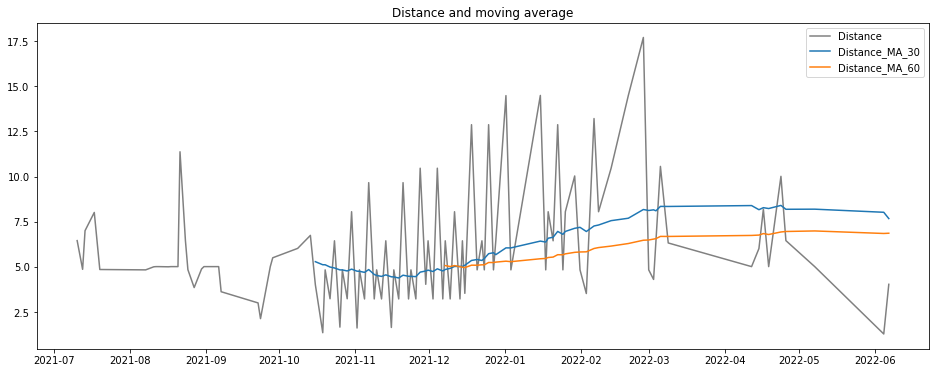

In [39]:
plt.figure(figsize=(16,6))
plt.title("Distance and moving average")
plt.plot(rundata['Date'],rundata['Distance'],label='distance',color='grey')
plt.plot(rundata['Date'],rundata['Distance_MA_30'],label = 'MA 30 days')
plt.plot(rundata['Date'],rundata['Distance_MA_60'],label = 'MA 60 days')
plt.legend(['Distance','Distance_MA_30','Distance_MA_60'])
plt.show()

## HR with moving average

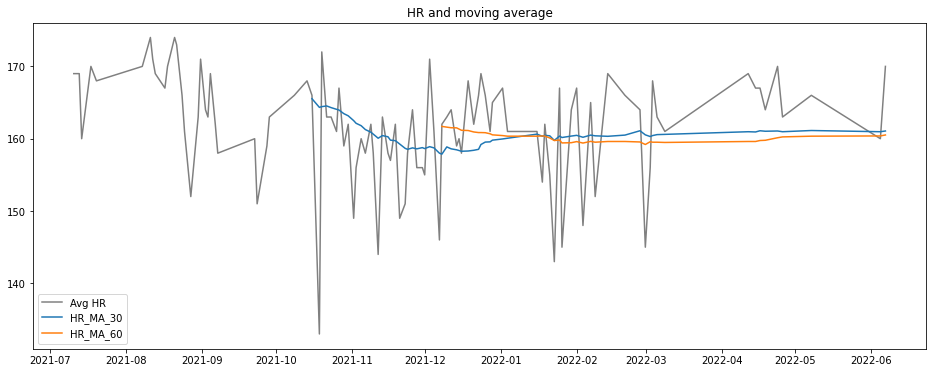

In [40]:
plt.figure(figsize=(16,6))
plt.title("HR and moving average")
plt.plot(rundata['Date'],rundata['Avg HR'],label='distance',color='grey')
plt.plot(rundata['Date'],rundata['Avg_HR_MA_30'],label = 'HR 30 days')
plt.plot(rundata['Date'],rundata['Avg_HR_MA_60'],label = 'HR 60 days')
plt.legend(['Avg HR','HR_MA_30','HR_MA_60'])
plt.show()

## Histogram of average pace

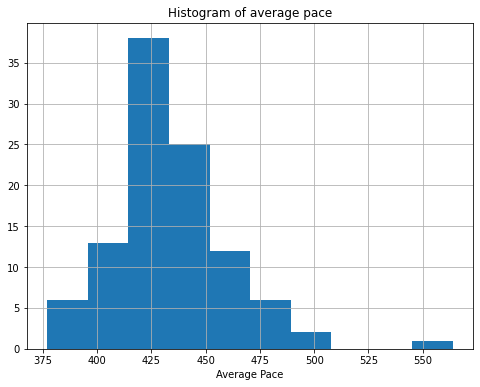

In [41]:
plt.figure(figsize=(8,6))
plt.title('Histogram of average pace')
plt.xlabel('Average Pace')
plt.hist(rundata['Avg_pace_secs'])
plt.grid()
plt.show()

## Histogram of HR

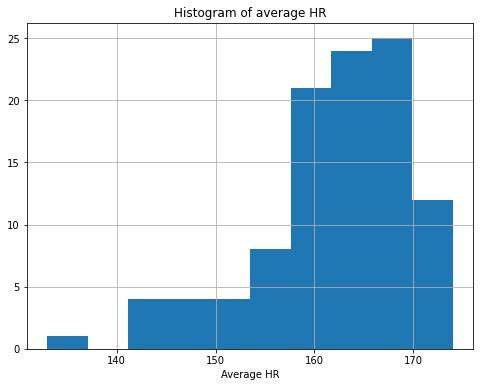

In [42]:
plt.figure(figsize=(8,6))
plt.title('Histogram of average HR')
plt.xlabel('Average HR')
plt.hist(rundata['Avg HR'])
plt.grid()
plt.show()

In [43]:
rundata[desc_cols].corr()

,Distance,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Time_in_secs,Avg_pace_secs,Hour_of_day,Calories,Best_pace_secs
Distance,1.000000,0.182179,0.114145,-0.086481,0.044946,-0.449952,0.995324,0.388532,-0.261706,0.993641,0.152280
Avg HR,0.182179,1.000000,0.727515,0.029740,0.001748,0.155872,0.150496,-0.166298,-0.043811,0.223118,-0.291151
Max HR,0.114145,0.727515,1.000000,0.168164,0.066937,0.260784,0.075115,-0.301218,-0.036123,0.128766,-0.252147
Avg Run Cadence,-0.086481,0.029740,0.168164,1.000000,0.298309,0.362367,-0.130770,-0.567791,0.153320,-0.083555,0.205413
Max Run Cadence,0.044946,0.001748,0.066937,0.298309,1.000000,0.133731,0.028039,-0.188670,-0.255734,0.045941,-0.022952
Avg Stride Length,-0.449952,0.155872,0.260784,0.362367,0.133731,1.000000,-0.512592,-0.963306,0.437850,-0.460344,-0.098740
Time_in_secs,0.995324,0.150496,0.075115,-0.130770,0.028039,-0.512592,1.000000,0.458046,-0.273788,0.991144,0.151943
Avg_pace_secs,0.388532,-0.166298,-0.301218,-0.567791,-0.188670,-0.963306,0.458046,1.000000,-0.416385,0.399158,0.041158
Hour_of_day,-0.261706,-0.043811,-0.036123,0.153320,-0.255734,0.437850,-0.273788,-0.416385,1.000000,-0.265900,0.126920
Calories,0.993641,0.223118,0.128766,-0.083555,0.045941,-0.460344,0.991144,0.399158,-0.265900,1.000000,0.153269


[Text(0.5, 1.0, 'Avg Pace vs Distance')]

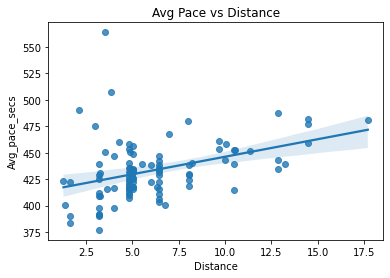

In [44]:
sns.regplot(x='Distance',y='Avg_pace_secs',data=rundata, fit_reg=True).set(title='Avg Pace vs Distance')

## Histogram of Avg Run Cadence

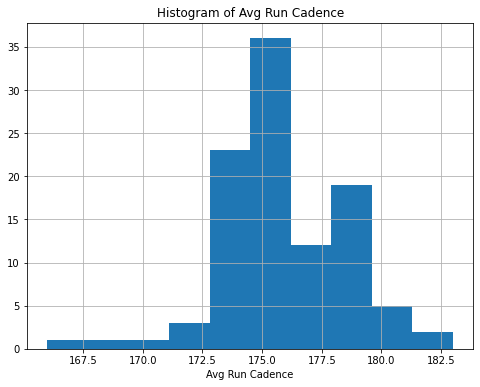

In [45]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Avg Run Cadence')
plt.xlabel('Avg Run Cadence')
plt.grid()
plt.hist(rundata['Avg Run Cadence'])
plt.show()

## Histogram of Distance

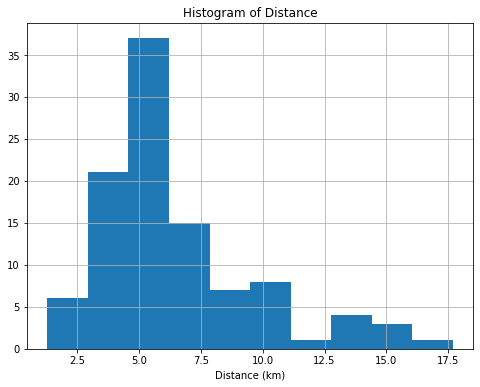

In [46]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Distance')
plt.xlabel('Distance (km)')
plt.grid()
plt.hist(rundata['Distance'])
plt.show()

In [47]:
rundata['Distance'].value_counts().head(10)

4.83     15
5.01     13
3.22     10
6.44      9
8.05      5
10.46     3
12.87     3
6.45      3
5.00      2
9.66      2
Name: Distance, dtype: int64

## Histogram of calories

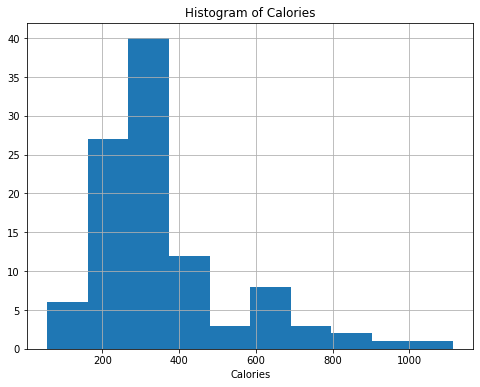

In [48]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Calories')
plt.xlabel('Calories')
plt.grid()
plt.hist(rundata['Calories'])
plt.show()

# Summaries

## Fastest runs

In [49]:
def print_best_perf(data: pd.DataFrame,distance: float, n=int):
    """
    Function that prints best performances based on distance and number of runs
    @data: dataset
    @param distance: Distance of the run
    @param n: number of top performances
    """
    print('Fastest {}k runs: '.format(distance))
    
    print(data[(data['Distance']<=distance+0.01) & (data['Distance']>=distance-0.01)].sort_values(by=['Avg_pace_secs']).head(n)[['Date','Distance','Time','Avg Pace']])
    print()


In [50]:
print_best_perf(rundata,6.44,3)

Fastest 6.44k runs: 
                  Date  Distance      Time Avg Pace
91 2022-03-03 17:46:52      6.44  00:43:15     6:43
77 2022-01-20 18:35:47      6.44  00:43:33     6:46
71 2021-12-28 09:06:19      6.44  00:44:04     6:51



In [51]:
main_distances = [3.22,4.83,5,6.44,8.05,10]

In [52]:
for i in main_distances:
    print_best_perf(rundata,i,3)

Fastest 3.22k runs: 
                  Date  Distance      Time Avg Pace
56 2021-12-02 18:09:49      3.22  00:20:13     6:17
48 2021-11-18 18:15:32      3.22  00:20:55     6:30
40 2021-11-04 19:22:18      3.22  00:20:58     6:31

Fastest 4.83k runs: 
                  Date  Distance      Time Avg Pace
35 2021-10-26 18:11:46      4.83  00:32:47     6:47
31 2021-10-19 17:45:07      4.83  00:32:59     6:50
68 2021-12-23 16:38:11      4.83  00:33:08     6:52

Fastest 5k runs: 
                  Date  Distance      Time Avg Pace
19 2021-09-03 06:50:16      5.01  00:34:47     6:56
10 2021-08-17 18:54:14      5.01  00:34:52     6:58
21 2021-09-06 06:40:54      5.01  00:34:54     6:58

Fastest 6.44k runs: 
                  Date  Distance      Time Avg Pace
91 2022-03-03 17:46:52      6.44  00:43:15     6:43
77 2022-01-20 18:35:47      6.44  00:43:33     6:46
71 2021-12-28 09:06:19      6.44  00:44:04     6:51

Fastest 8.05k runs: 
                  Date  Distance      Time Avg Pace
76 2022-01

## Totals and averages

In [53]:
print('Total calories burnt: ' + str(rundata['Calories'].sum()))
print('Total distance run: ' + str(rundata['Distance'].sum()))
print('Average pace: ' + str(round(rundata['Avg_pace_secs'].mean(),2)))
print('Average heart rate: ' + str(round(rundata['Avg HR'].mean(),2)))
print('Longest distance run: ' + str(rundata['Distance'].max()))

Total calories burnt: 35933
Total distance run: 626.23
Average pace: 433.25
Average heart rate: 161.77
Longest distance run: 17.7
